In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров.

In [2]:
from scipy.cluster.vq import whiten, kmeans2
from pprint import pprint

thanks for registering for an API authentication token. Please modify your client to use a HTTP header named "X-Auth-Token" with the underneath personal token as value.

Your API token: e6258a8d09f94814934becc411b3cbe0
c2b01b8b299a4bb7987d9bcd064aee40

In [7]:
headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0'}
#c52b7825851b4357af3e06c1888152f0

In [8]:
print(headers)
def call_api(uri, result_key, headers=headers):
    json = {}
    try:
        json = requests.get(uri, headers).json()
        #pprint(json[result_key])
        return json[result_key]
    except:
        #pprint(json)
        return None

{'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0'}


In [9]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [11]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    losses = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            losses += 1 if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            losses += 1 if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} goals, {} losses'.format(team['name'], goals, losses))
    team['goals'] = goals
    team['losses'] = losses

Team "FC Rio Ave", 41 goals, 13 losses
Team "FC Porto", 84 goals, 5 losses
Team "Moreirense FC", 33 goals, 17 losses
Team "FC Paços de Ferreira", 32 goals, 14 losses
Team "Sporting CP", 73 goals, 11 losses
Team "Maritimo Funchal", 34 goals, 10 losses
Team "CD Tondela", 29 goals, 18 losses
Team "SL Benfica", 83 goals, 5 losses
Team "Boavista Porto FC", 33 goals, 11 losses
Team "FC Arouca", 33 goals, 20 losses
Team "Vitoria Setubal", 30 goals, 16 losses
Team "C.F. Os Belenenses", 27 goals, 16 losses
Team "Vitoria Guimaraes", 50 goals, 8 losses
Team "Sporting Braga", 51 goals, 10 losses
Team "GD Estoril Praia", 36 goals, 16 losses
Team "Feirense", 31 goals, 14 losses
Team "Nacional Funchal", 22 goals, 21 losses
Team "G.D. Chaves", 35 goals, 12 losses


In [12]:
team_for_pd = []
for team in teams:
    if team['losses']:
        team_for_pd.append({'name': team['name'], 'losses': team['losses'], 'goals': team['goals']})
team_for_pd

[{'goals': 41, 'losses': 13, 'name': 'FC Rio Ave'},
 {'goals': 84, 'losses': 5, 'name': 'FC Porto'},
 {'goals': 33, 'losses': 17, 'name': 'Moreirense FC'},
 {'goals': 32, 'losses': 14, 'name': 'FC Paços de Ferreira'},
 {'goals': 73, 'losses': 11, 'name': 'Sporting CP'},
 {'goals': 34, 'losses': 10, 'name': 'Maritimo Funchal'},
 {'goals': 29, 'losses': 18, 'name': 'CD Tondela'},
 {'goals': 83, 'losses': 5, 'name': 'SL Benfica'},
 {'goals': 33, 'losses': 11, 'name': 'Boavista Porto FC'},
 {'goals': 33, 'losses': 20, 'name': 'FC Arouca'},
 {'goals': 30, 'losses': 16, 'name': 'Vitoria Setubal'},
 {'goals': 27, 'losses': 16, 'name': 'C.F. Os Belenenses'},
 {'goals': 50, 'losses': 8, 'name': 'Vitoria Guimaraes'},
 {'goals': 51, 'losses': 10, 'name': 'Sporting Braga'},
 {'goals': 36, 'losses': 16, 'name': 'GD Estoril Praia'},
 {'goals': 31, 'losses': 14, 'name': 'Feirense'},
 {'goals': 22, 'losses': 21, 'name': 'Nacional Funchal'},
 {'goals': 35, 'losses': 12, 'name': 'G.D. Chaves'}]

In [13]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,losses,name
0,41,13,FC Rio Ave
1,84,5,FC Porto
2,33,17,Moreirense FC
3,32,14,FC Paços de Ferreira
4,73,11,Sporting CP
5,34,10,Maritimo Funchal
6,29,18,CD Tondela
7,83,5,SL Benfica
8,33,11,Boavista Porto FC
9,33,20,FC Arouca


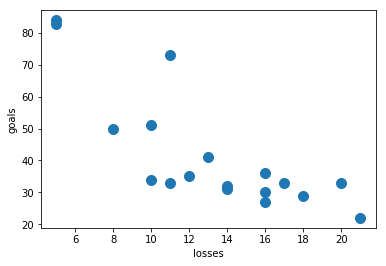

In [14]:
teams_pd.plot.scatter(x='losses', y='goals', s=100)

In [15]:
del teams_pd['name']
teams_pd

,goals,losses
0,41,13
1,84,5
2,33,17
3,32,14
4,73,11
5,34,10
6,29,18
7,83,5
8,33,11
9,33,20


In [16]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.22664202,  2.89684728],
       [ 4.56190073,  1.11417203],
       [ 1.79217529,  3.7881849 ],
       [ 1.73786694,  3.11968168],
       [ 3.96450897,  2.45117846],
       [ 1.84648363,  2.22834406],
       [ 1.57494192,  4.0110193 ],
       [ 4.50759239,  1.11417203],
       [ 1.79217529,  2.45117846],
       [ 1.79217529,  4.45668812],
       [ 1.62925026,  3.56535049],
       [ 1.46632523,  3.56535049],
       [ 2.7154171 ,  1.78267525],
       [ 2.76972544,  2.22834406],
       [ 1.95510031,  3.56535049],
       [ 1.6835586 ,  3.11968168],
       [ 1.19478352,  4.67952252],
       [ 1.90079197,  2.67401287]])

In [17]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 2.08408262,  2.56259567],
        [ 4.34466736,  1.55984084],
        [ 1.62925026,  3.94735233]]),
 array([0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0]))

In [18]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'g',
 'b',
 'r',
 'g',
 'r',
 'b',
 'g',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r']

In [20]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 1.62925026,  3.94735233],
        [ 1.88268919,  3.04540355],
        [ 1.84648363,  2.45117846],
        [ 4.34466736,  1.55984084],
        [ 2.74257127,  2.00550965]]),
 array([1, 3, 0, 1, 3, 2, 0, 3, 2, 0, 0, 0, 4, 4, 0, 1, 0, 2]))

In [21]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'y',
 'r',
 'g',
 'y',
 'b',
 'r',
 'y',
 'b',
 'r',
 'r',
 'r',
 'm',
 'm',
 'r',
 'g',
 'r',
 'b']

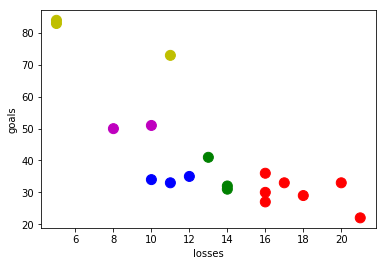

In [22]:
teams_pd.plot.scatter(x='losses', y='goals', c=colors, s=100)

In [23]:
def get_dot_diagram(count=3):
    centroids, cluster_map = kmeans2(whitened, count)
    colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
    colors = [colors_map[c] for c in cluster_map]
    teams_pd.plot.scatter(x='losses', y='goals', c=colors, s=100)

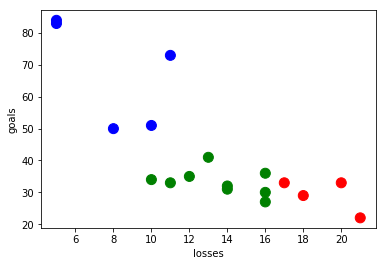

In [24]:
get_dot_diagram(3)

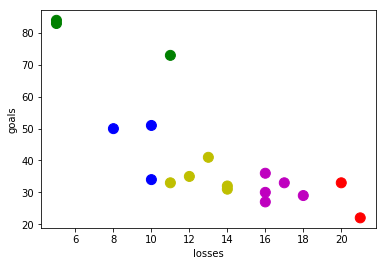

In [26]:
get_dot_diagram(5)